**IMPORTANDO LIBRERIAS**

In [116]:
from selenium import webdriver

In [117]:
from bs4 import BeautifulSoup as bs

In [4]:
import pandas as pd
pd.set_option("display.precision", 1)

In [3]:
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

In [5]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

**WEB SCRAPLING**

In [135]:
lista_m2 = []
lista_precio = []
lista_ubicacion = []

In [89]:
URL_1 = 'https://www.inmuebles24.com/casas-en-monterrey.html'

In [93]:
URL_2 = 'https://www.inmuebles24.com/casas-en-monterrey-pagina-2.html'

In [111]:
URL_3 = 'https://www.inmuebles24.com/casas-en-monterrey-pagina-3.html'

In [112]:
driver_1 = webdriver.Chrome("C:/chromedriver.exe")
driver_1.get(URL_1)

In [132]:
contenido_1 = driver_1.page_source #OBTENER EL CODIGO HTML

In [133]:
soup_1 = bs(contenido_1) #LEER EL CODIGO HTML

In [134]:
soup_1.title

<title>Casas en Monterrey - Inmuebles24</title>

In [136]:
for tarjeta in soup_1.find_all("div",attrs = {"class":"sc-i1odl-2 gmMYEe"}): #Dentro del codigo HTML va a encontrar todos los objetos tipos div y con esa clase
    #SON LAS TAREJTAS EN LA PAGINA WEB QUE CONTIENEN EL PRECIO, METROS CUADRADOS, UBICACION, ETC.
    area = tarjeta.find("span")
    lista_m2.append(area.text)
    
    precio = tarjeta.find("div",attrs = {"data-qa":"POSTING_CARD_PRICE"}) 
    lista_precio.append(precio.text)
    
    ubi = tarjeta.find("div",attrs = {"data-qa":"POSTING_CARD_LOCATION"})
    lista_ubicacion.append(ubi.text)

#Para traer la area,precio y ubicacion de la tarjeta dentro de la pagina web, vamos a encontrar (metodo find) dentro de esa tarjeta
#los objetos de tipo div con sus respectivas data-qa según el area, precio o clase en la de ubicacion en el codigo HTML de la pagina

In [96]:
driver_2 = webdriver.Chrome("C:/chromedriver.exe")
driver_2.get(URL_2)

In [137]:
contenido_2 = driver_2.page_source 

In [138]:
soup_2 = bs(contenido_2) 

In [139]:
for tarjeta in soup_2.find_all("div",attrs = {"class":"sc-i1odl-2 gmMYEe"}): #Dentro del codigo HTML va a encontrar todos los objetos tipos div y con esa clase
    #SON LAS TAREJTAS EN LA PAGINA WEB QUE CONTIENEN EL PRECIO, METROS CUADRADOS, UBICACION, ETC.
    area = tarjeta.find("span")
    lista_m2.append(area.text)
    
    precio = tarjeta.find("div",attrs = {"data-qa":"POSTING_CARD_PRICE"}) 
    lista_precio.append(precio.text)
    
    ubi = tarjeta.find("div",attrs = {"data-qa":"POSTING_CARD_LOCATION"})
    lista_ubicacion.append(ubi.text)

In [113]:
driver_3 = webdriver.Chrome("C:/chromedriver.exe")
driver_3.get(URL_3)

In [140]:
contenido_3 = driver_3.page_source

In [141]:
soup_3 = bs(contenido_3) 

In [142]:
for tarjeta in soup_3.find_all("div",attrs = {"class":"sc-i1odl-2 gmMYEe"}): #Dentro del codigo HTML va a encontrar todos los objetos tipos div y con esa clase
    #SON LAS TAREJTAS EN LA PAGINA WEB QUE CONTIENEN EL PRECIO, METROS CUADRADOS, UBICACION, ETC.
    area = tarjeta.find("span")
    lista_m2.append(area.text)
    
    precio = tarjeta.find("div",attrs = {"data-qa":"POSTING_CARD_PRICE"}) 
    lista_precio.append(precio.text)
    
    ubi = tarjeta.find("div",attrs = {"data-qa":"POSTING_CARD_LOCATION"})
    lista_ubicacion.append(ubi.text)

In [146]:
#IMPRIMIENDO LOS PRIMEROS 25 DATOS DE LA LISTA DE M2
lista_m2[0:25]

[' 370 m² ',
 ' 140 m² ',
 ' 158 m² ',
 ' 250 m² ',
 ' 304 m² ',
 ' 212 m² ',
 ' 273 m² ',
 ' 308 m² ',
 ' 288 m² ',
 ' 238 m² ',
 ' 284 m² ',
 ' 560 m² ',
 ' 225 m² ',
 ' 3660000 m² ',
 ' 375 m² ',
 ' 424 m² ',
 ' 252 m² ',
 ' 241 m² ',
 ' 230 m² ',
 ' 298 m² ',
 ' 298 m² ',
 ' 236 m² ',
 ' 160 m² ',
 ' 134 m² ',
 ' 390 m² ']

In [148]:
#IMPRIMIENDO LOS PRIMEROS 25 DATOS DE LA LISTA DE UBICACION
lista_ubicacion[0:25]

['Sierra Alta 6 Sector, Monterrey',
 'Cerradas de Cumbres, Monterrey',
 'Laderas del Mirador (F-XXI), Monterrey',
 'Colonial Cumbres, Monterrey',
 'El Uro, Monterrey',
 'El Barro, Monterrey',
 'San Jerónimo, Monterrey',
 'Valle de Cristal, Monterrey',
 'Antigua Hacienda Santa Anita, Monterrey',
 'Cumbres 4to Sector, Monterrey',
 'Aires del Vergel, Monterrey',
 'Residencial y Club de Golf La Herradura, Monterrey',
 'Vistancias 1er Sector, Monterrey',
 'Los Cristales, Monterrey',
 'San Jerónimo, Monterrey',
 'La Joya Privada residencial, Monterrey',
 'Las Cumbres 2 Sector, Monterrey',
 'Cumbres, Monterrey',
 'Las Cumbres 5 Sector A, Monterrey',
 'Monterrey, Nuevo León',
 'Monterrey, Nuevo León',
 'La Alhambra, Monterrey',
 'Cumbres Elite, Monterrey',
 'Monterrey, Nuevo León',
 'Centro, Monterrey']

In [150]:
#VAMOS A QUITAR LOS ESPACIOS EN LOS ELEMENTOS DE LA LISTA DE M2
lista_m2 = [elemento.replace(" ","") for elemento in lista_m2]

In [159]:
#VAMOS A QUITAR EL SIMBOLO DE MONEDA Y LAS COMAS EN LOS ELEMENTOS DE LA LISTA DE PRECIO
#Y VAMOS A QUITAR EL VALOR DE USD EN USD 3500000 QUE NOS DIMOS CUENTA QUE APARECIA EN LA LISTA
lista_precio = [precio.replace("MN ","") for precio in lista_precio]
lista_precio = [precio.replace(",","") for precio in lista_precio]
lista_precio[lista_precio.index('USD 3500000')] = lista_precio[lista_precio.index('USD 3500000')].replace("USD ","")

**TRABAJANDO CON PANDAS**

In [ ]:
#CREANDO UN DATA FRAME CON LAS LISTAS ANTERIORES
Datos = pd.DataFrame({"Ubicacion":lista_ubicacion,"M2":lista_m2,"Precio":lista_precio})

In [139]:
#NOTAMOS QUE EXISTE EL SIGUIENTE DATO EN EL DATA FRAME
#EL CUAL ES DE UNA CASA CON UN VALOR EN DOLARES Y TODAS LAS CASAS TIENEN UN PRECIO EN PESOS MEXICANOS
Datos["Precio"][49]

'USD 3500000'

In [ ]:
#VAMOS A ELIMINAR ESA FILA DEL DATA FRAME
Datos.drop([49],axis=0,inplace=True)

In [141]:
#TAMBIEN NOTAMOS LOS SIGUIENTES DATOS EN LA COLUMNA DE M2, LOS CUALES PRESENTAN MUCHA VARIACION CON LA MAYORIA DE LOS DATOS
Datos["M2"][[13,31]]

13    3660000m²
31    3660000m²
Name: M2, dtype: object

In [142]:
#ELIMINANDO ESOS DATOS DEL DATA FRAME
Datos.drop([13,31],axis=0,inplace=True)

In [145]:
#ORDENANDO LOS INDICES DEL DATA FRAME
Datos.sort_index(inplace=True)

In [148]:
#VEMOS QUE DESPUÉS DE ELIMINAR LOS 3 DATOS ANTERIORES LA LONGITUD DEL DATA FRAME ES DE 57 DATOS EN TOTAL
len(Datos)

57

In [149]:
#PARA LOS DATOS DE LA COLUMNA DE M2 VAMOS A REALIZARLES UNAS MODIFICACIONES
m2_nueva = [] #CREANDO UNA LISTA NUEVA
for i in Datos["M2"]:
    i = i.replace("m²","") #QUITANDO EL SIMBOLO DE m² A CADA DATO
    i = int(i) #CONVIRTIENDO A ENTERO CADA DATO
    m2_nueva.append(i) #AGREGANDO ESE DATO A LA LISTA NUEVA

In [150]:
Datos["M2"] = m2_nueva #REMPLAZANDO LA COLUMNA DE M2 POR LA LISTA NUEVA CON LAS MODIFICACIONES

In [193]:
Datos["Precio"] = Datos["Precio"].astype(int) #CONVIRTIENDO LOS DATOS DE LA COLUMNA PRECIO A INT

In [194]:
Datos.dtypes #OBTENIENDO LOS TIPOS DE DATOS DE CADA COLUMNA

Ubicacion    object
M2            int64
Precio        int32
dtype: object

In [166]:
#VAMOS A GUARDAR LOS DATOS DEL DATA FRAME EN UN ARCHIVO CSV
Datos.to_csv("Casas_en_ventas.csv",index = False, encoding ="utf-8")

In [15]:
Datos = pd.read_csv("Casas_en_ventas.csv")

In [7]:
#OBTENIENDO LOS PRIMEROS 20 VALORES DEL DATA FRAME
Datos.head(20)

,Ubicacion,M2,Precio
0,"Sierra Alta 6 Sector, Monterrey",370,65000
1,"Cerradas de Cumbres, Monterrey",140,3700000
2,"Laderas del Mirador (F-XXI), Monterrey",158,2850000
3,"Colonial Cumbres, Monterrey",250,7900000
4,"El Uro, Monterrey",304,9500000
5,"El Barro, Monterrey",212,8250000
6,"San Jerónimo, Monterrey",273,70000
7,"Valle de Cristal, Monterrey",308,7700000
8,"Antigua Hacienda Santa Anita, Monterrey",288,8800000
9,"Cumbres 4to Sector, Monterrey",238,5750000


In [16]:
#VAMOS A CONCENTRARNOS EN LAS CASAS QUE TIENEN MENOS DE 1500 m2
Datos = Datos[Datos["M2"]<1500]
len(Datos) #LAS CUALES 56 CASAS (SOLAMENTE UNA CASA TIENE MAS DE 1500 m2)

56

In [17]:
#OBTENIENDO UNAS ESTADISTICAS DESCRIPTIVAS DE LAS COLUMNAS DE M2 Y PRECIO
Datos.describe()

,M2,Precio
count,56.0,5.6e+01
mean,336.0,9.0e+06
std,253.3,7.4e+06
min,134.0,1.4e+04
25%,210.5,5.5e+06
50%,259.0,7.7e+06
75%,331.8,9.7e+06
max,1350.0,3.8e+07


**VISUALIZANDO LOS DATOS**

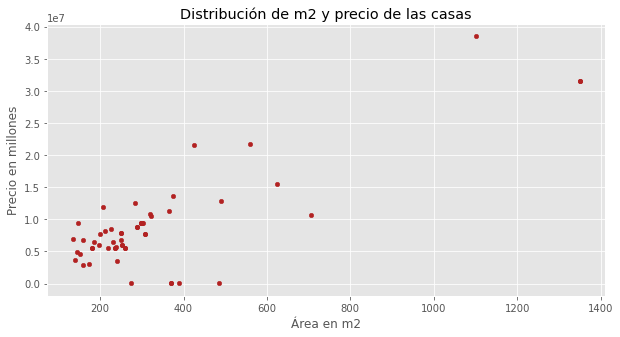

In [75]:
fig, ax = plt.subplots(figsize=(10, 5))

Datos.plot(
    x    = "M2",
    y    = 'Precio',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de m2 y precio de las casas');
ax.set_xlabel("Área en m2")
ax.set_ylabel("Precio en millones")
plt.show()

In [19]:
#CORRELACIÓN LINEAL ENTRE LAS DOS VARIABLES
corr_test = pearsonr(x = Datos['M2'], y =  Datos['Precio'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.813192923245884
P-value:  2.6623095658804244e-14


El gráfico y el test de correlación muestran que existe una relación linealentre las variables de área (m2) y precio de las casas,donde la intensidad de ésta es considerable (r = 0.813) y significativa (p-value = 2.66e-14).\
Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el valor en el precio de las casas en función de su área total.

**AJUSTE DEL MODELO**

In [26]:
from sklearn.linear_model import LinearRegression 

In [27]:
modelo = LinearRegression()

In [34]:
modelo.fit(Datos["M2"].values.reshape(-1,1),Datos["Precio"])

LinearRegression()

In [72]:
#INFORMACION DEL MODELO
print("Intercepción del modelo:",modelo.intercept_)
print("Coeficiente del modelo:" ,modelo.coef_.flatten()[0])
print("Coeficiente de determinación R^2:", modelo.score(Datos["M2"].values.reshape(-1,1),Datos["Precio"]))

Intercepción del modelo: 968075.1903809123
Coeficiente del modelo: 23876.472835131473
Coeficiente de determinación R^2: 0.6612827304171861


La ecuación del modelo de regresión lineal es:

**y = 23876.47*x + 968075.19**


**VISUALIZANDO LOS DATOS CON LA RECTA DE REGRESION**

In [65]:
valores_modelo = [modelo.coef_.flatten()[0]*i + modelo.intercept_ for i in Datos["M2"]]

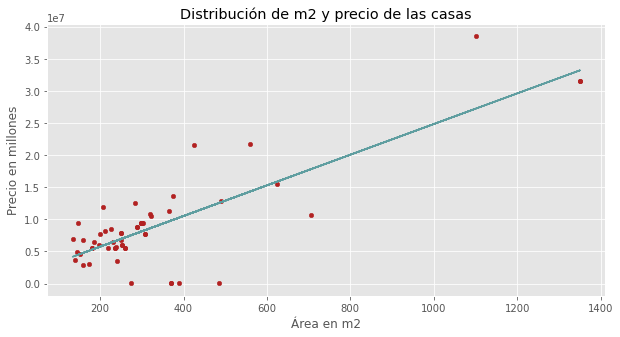

In [76]:
fig, ax = plt.subplots(figsize=(10, 5))

Datos.plot(
    x    = "M2",
    y    = 'Precio',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de m2 y precio de las casas');
ax.set_xlabel("Área en m2")
ax.set_ylabel("Precio en millones")
plt.plot(Datos["M2"],valores_modelo,color = "cadetblue")
plt.show()